# Some Preliminary Math

In [3]:
%run tools.ipynb

## Concept of Distance

With any two 2-D points, you can form a right triangle by drawing a horizontal line from one point to just below the next.  Then you can draw a vertical line up to the other point.  Connect the two points along the diagnal and you have a right triangle where the length of the sides are:
- $x_2 - x_1$
- $y_2 - y_1$
- Then the hypoteneuse is:
  
  $ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $

The hypoteneuse is the distance between the two points - more specifically the Euclidian distance.


In [4]:
a = distance_animation()
HTML(a.to_jshtml())

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

### What about 3-D?

Same process applies - just with another term.
- $x_2 - x_1$
- $y_2 - y_1$
- $z_2 - z_1$
- Then the distance is:
  
  $ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2} $

This process carries to any number of dimensions.


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

### Example: Distance between colors

Lets say we have a color: 

#D053DB
<div style="background-color: #d053db; width: 50px; height: 50px"></div>

<p></p>
And we want to know if it is more similar to this one:

#8953DB
<div style="background-color: #8953db; width: 50px; height: 50px"></div>

<p></p>
Or this one:

#DB537A
<div style="background-color: #db537a; width: 50px; height: 50px"></div>


In [5]:
x1, y1, z1 = 208, 83, 219 # #D053DB to decimal components.

x2, y2, z2 = 137, 83, 219 # #8953DB

x3, y3, z3 = 219, 83, 122 # #DB537A


print("Distance between #D053DB and #8953DB:", ((x2 - x1)**2 + (y2 -y1)**2 + (z2 - z1)**2)**.5)
print("Distance between #D053DB and #DB537A:", ((x3 - x1)**2 + (y3 -y1)**2 + (z3 - z1)**2)**.5)


Distance between #D053DB and #8953DB: 71.0
Distance between #D053DB and #DB537A: 97.62171889492625


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

## What are Vectors

If we continue to higher dimensions, say 255 space or 4096 space, we don't have enough letters to keep going with this method.  Also, the formulas become unwieldy.

In software, we will put these into an array:


In [6]:
# These are the colors from before, represented as vectors

a = np.array([208, 83, 219])
b = np.array([137, 83, 219])
c = np.array([219, 83, 122])

Mathemeticians call this a **vector**.

This also simplifies our representation of the formula and can generalize it to any length:


In [7]:
print("The distance between b and a: ", sum((b - a)**2)**.5)
print("The distance between c and a: ", sum((c - a)**2)**.5)

The distance between b and a:  71.0
The distance between c and a:  97.62171889492625


Better, use a function built into numpy:

In [8]:
print("The distance between b and a: ", np.linalg.norm(b - a))
print("The distance between c and a: ", np.linalg.norm(c - a))

The distance between b and a:  71.0
The distance between c and a:  97.62171889492625


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

### More complicated view of vectors

- **Software engineer:** A list of numbers (or a list of something - it doesn't have to be numbers).
- **Mathemetician:** A point in $ \mathbb{R}^n $ space (n is the number of dimensions)
- **Physisists:** A direction and a magnitude.

These are different views of the same thing. In the physisists view, we may be considering an object moving
in a direction and a speed, vectors give us a way to represent this in a simple notation.


#### Direction/magnitude

This use of vectors can be represented as an arrow pointing from (0, 0) to the target of the vector.  The longer the length
of the arrow represents its magnitude.  It can be computed as its distance from 0, 0.


In [9]:
p1 = np.array([3,3])
p2 = np.array([6,7])
p3 = np.array([0.5,5])
p4 = 0 - p1

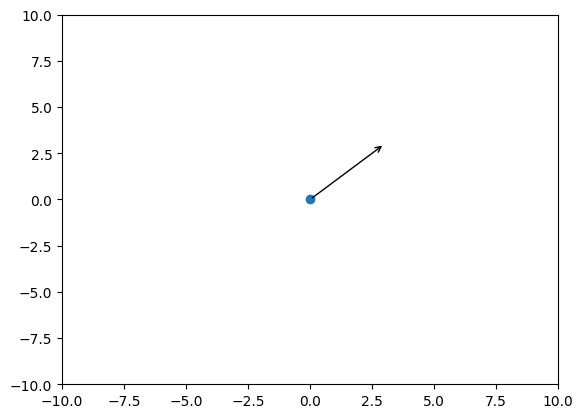

In [10]:
plt.cla()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.scatter([0],[0])
_ = plt.annotate("", xy=p1, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))

In [11]:
print(f"The magnitude is: {np.linalg.norm(p1)}")

The magnitude is: 4.242640687119285


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

# Cosine Similarity

Measures generally how close two vectors are pointing in the same direction.

$$ \frac{A \cdot B}{||A|| ||B||} $$

This gives us a value between -1 and 1.  Where the closer to 1, the more the vectors point in the same direction.  -1 indicates they are pointing in the opposite direction.


In [12]:
def cosine_similarity(a, b):
      return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

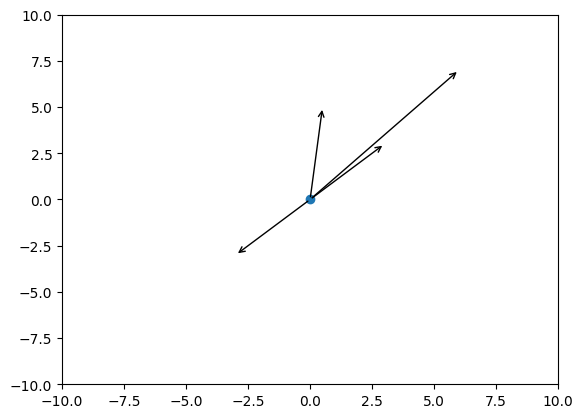

In [13]:
plt.cla()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.scatter([0],[0])
plt.annotate("", xy=p1, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=p2, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=p3, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=p4, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))

plt.show()

In [14]:
p1p2_csim = cosine_similarity(p1, p2)
p1p3_csim = cosine_similarity(p1, p3)
p1p4_csim = cosine_similarity(p1, p4)
print(f"p1 -> p2: {p1p2_csim:.3f}")
print(f"p2 -> p3: {p1p3_csim:.3f}")
print(f"p2 -> p3: {p1p4_csim:.3f}")

p1 -> p2: 0.997
p2 -> p3: 0.774
p2 -> p3: -1.000


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

## What is a Tensor?

The term tensor is thrown around alot when talking about AI.  

It is a general term for vectors, matricies
- Vector
- Matrix
- Layers (think of an image with 3 color layers)
- ...

